# HD-GLIO-TCGA-06_1802 

**(ELMED219-2021 Lab3-BRATS)**

We will need (a Linux computer):

- Nvidia GPU (>= 6 GB video memory) and [CUDA](https://developer.nvidia.com/cuda-toolkit)
- [dcm2niix](https://github.com/rordenlab/dcm2niix) for converting DICOM images to NIFTI
- [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FSL) installed (for 3D image registration [[flirt](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FLIRT)] and more)
- HD-BET installed (https://github.com/NeuroAI-HD/HD-BET)
- HD-GLIO installed (https://github.com/NeuroAI-HD/HD-GLIO)
- [Freesurfer](https://surfer.nmr.mgh.harvard.edu) installed - for visualization [[freeview](https://surfer.nmr.mgh.harvard.edu/fswiki/FreeviewGuide/FreeviewGeneralUsage/FreeviewQuickStart)] (and possibly segmentation of normal brain in the 3D T1-w channel)

(see also the local [environment.yml](./hd-glioma-environment.yml) file producing the `hd-glioma` conda environmet)

# The TCGA-GBM data collection

https://wiki.cancerimagingarchive.net/display/Public/TCGA-GBM

The Cancer Imaging Archieve (TCIA) is a service which de-identifies and hosts a large archive of medical images of cancer accessible for public download. The data are organized as “collections”; typically patients’ imaging related by a common disease (e.g. lung cancer), image modality or type (MRI, CT, digital histopathology, etc) or research focus. DICOM is the primary file format used by TCIA for radiology imaging. Supporting data related to the images such as patient outcomes, treatment details, genomics and expert analyses are also provided when available.

The data is publically and directily available according to [CC BY 3.0](https://creativecommons.org/licenses/by/3.0) licensing with proper attribution to the TCGA Research Network (see below for citations). I.e. you are free to **share** - copy and redistribute the material in any medium or format and 
**adapt** - remix, transform, and build upon the material for any purpose, even commercially. 

The **Cancer Genome Atlas Glioblastoma Multiforme** (TCGA-GBM) data collection is part of a larger effort to build a research community focused on connecting cancer phenotypes to genotypes by providing clinical images matched to subjects from The Cancer Genome Atlas ([TCGA](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga)). 

Clinical, genetic, and pathological data resides in the [Genomic Data Commons (GDC) Data Portal](https://portal.gdc.cancer.gov/exploration?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.program.name%22%2C%22value%22%3A%5B%22TCGA%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-GBM%22%5D%7D%7D%5D%7D) while the radiological data is stored on The Cancer Imaging Archive ([TCIA](https://www.cancerimagingarchive.net)). 
Matched TCGA patient identifiers allow researchers to explore the TCGA/TCIA databases for correlations between tissue genotype, radiological phenotype and patient outcomes.  

Tissues for TCGA were collected from many sites all over the world in order to reach their accrual targets, usually around 500 specimens per cancer type.  For this reason the image data sets are also extremely heterogeneous in terms of scanner modalities, manufacturers and acquisition protocols.  In most cases the images were acquired as part of routine care and not as part of a controlled research study or clinical trial. 

#### CIP TCGA Radiology Initiative

Imaging Source Site (ISS) Groups are being populated and governed by participants from institutions that have provided imaging data to the archive for a given cancer type. Modeled after TCGA analysis groups, ISS groups are given the opportunity to publish a marker paper for a given cancer type per the guidelines in the table above. This opportunity will generate increased participation in building these multi-institutional data sets as they become an open community resource.  Learn more about the [TCGA Glioma Phenotype Research Group](https://wiki.cancerimagingarchive.net/display/Public/TCGA+Glioma+Phenotype+Research+Group).

### Citations & Data Useage Policy

Citations & Data Usage Policy 
Users of this data must abide by the [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0) under which it has been published. Attribution should include references to the following citations:

**TCGA Attribution**

"The results [published or shown] here are in whole or part based upon data generated by the TCGA Research Network: http://cancergenome.nih.gov."

**Data Citation**

Scarpace, L., Mikkelsen, T., Cha, soonmee, Rao, S., Tekchandani, S., Gutman, D., … Pierce, L. J. (2016). Radiology Data from The Cancer Genome Atlas Glioblastoma Multiforme [TCGA-GBM] collection. The Cancer Imaging Archive. http://doi.org/10.7937/K9/TCIA.2016.RNYFUYE9

**TCIA Citation**

Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. *The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository*, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057. (paper DOI:10.1007/s10278-013-9622-7) [[link](https://link.springer.com/article/10.1007/s10278-013-9622-7)]

# The data set we will be using

We will be using a four-channel multispectral image (an axial slice from a multispectral 3D recording is shown below),  <br>
downloded from the TCGA-GBM data collection - i.e. study TCGA-06-1802.
The DICOM images were converted to NIFTI using the [dcm2niix](https://github.com/rordenlab/dcm2niix) software. 

![TCGA-GBM-dataset](./assets/TCGA-GBM-dataset.png)

### Import libraries

In [9]:
%matplotlib inline
# This to be able to display figures and graphs within the notebook browser
import warnings
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Which computing resources do we have (GPU)?

In [10]:
#!nvidia-smi  # (nvidia-smi -l 1)

![nvidia-smi-dell5820](./assets/nvidia-smi-dell5820.png)

### Select and read the 3D T1, CT1 (Gd-contrast), T2 and FLAIR channel images in NIFTI format

In [11]:
# Using nibabel to read the multispectral image
base = './data/TCGA-06-1802'
fn_t1 = '%s_7_AX_T1_pre_GD_FLAIR.nii.gz' % base     # T1.nii.gz
fn_t1gd = '%s_8_AX_T1_POST_GD_FLAIR.nii.gz' % base  # CT1.nii.gz
fn_t2 = '%s_5_AX_T2_FR-FSE.nii.gz' % base           # T2.nii.gz
fn_flair = '%s_6_Ax_T2_FLAIR.nii.gz' % base         # FLAIR.nii.gz

In [12]:
def load_chn(chn):
    img = nib.load(chn)
    return img

img_t1 = load_chn(fn_t1)
img_t1gd = load_chn(fn_t1gd)
img_t2 = load_chn(fn_t2)
img_flair = load_chn(fn_flair)

### Display the 3D images  ([plotting brain images](https://nilearn.github.io/plotting/index.html))

In [13]:
def chn_info(name_chn, chn):
    print(f' %s.shape: {chn.shape}\t%s.header.get_zooms(): {chn.header.get_zooms()} [mm]  max SI = %.2f'
          % (name_chn, name_chn, np.max(chn.get_fdata())))
    return np.max(chn.get_fdata())

print('Info %s:' % base)
maxT2 = chn_info('T2',img_t2)
maxFLAIR = chn_info('FLAIR',img_flair)
maxT1 = chn_info('T1',img_t1)
maxCT1 = chn_info('CT1',img_t1gd)

Info ./data/TCGA-06-1802:
 T2.shape: (512, 512, 20)	T2.header.get_zooms(): (0.4297, 0.4297, 7.499882) [mm]  max SI = 1774.00
 FLAIR.shape: (512, 512, 25)	FLAIR.header.get_zooms(): (0.4297, 0.4297, 5.9998765) [mm]  max SI = 1299.00
 T1.shape: (512, 512, 30)	T1.header.get_zooms(): (0.4297, 0.4297, 5.000104) [mm]  max SI = 2645.00
 CT1.shape: (512, 512, 30)	CT1.header.get_zooms(): (0.4297, 0.4297, 5.000104) [mm]  max SI = 2751.00


Using Nilearn plotting where [dim](https://nilearn.github.io/auto_examples/01_plotting/plot_dim_plotting.html) modifies the contrast of the image: dim=0 leaves the image unchanged, negative values of dim enhance it, and positive values decrease it (dim the background).



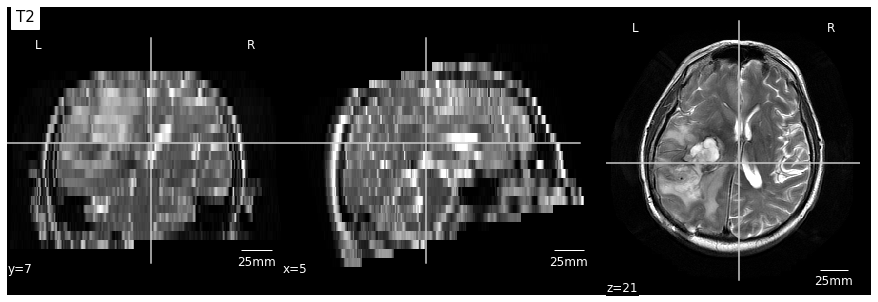

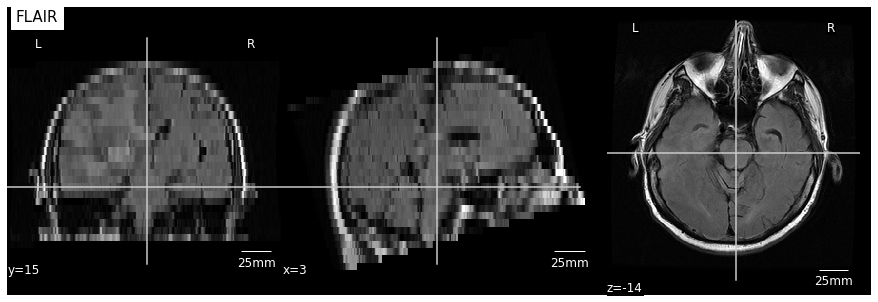

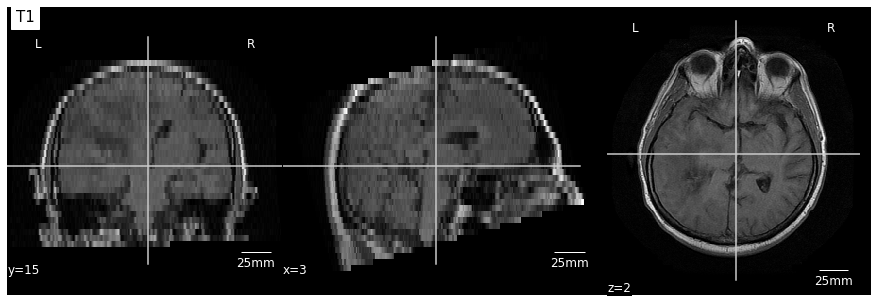

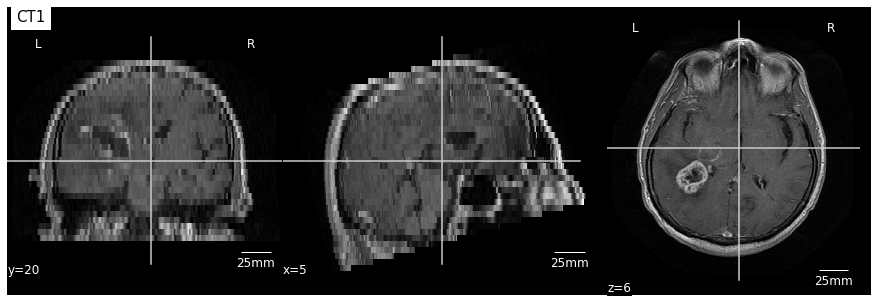

In [14]:
warnings.filterwarnings("ignore")

def display_chn(name_chn, chn):
    fig = plt.figure(figsize=(12, 4))
    display = plotting.plot_anat(chn,title=name_chn, figure=fig, dim=-0.8)
    display.annotate(scalebar=True, scale_size=25, scale_units='mm')
    plotting.show()
    
display_chn("T2", img_t2)
display_chn("FLAIR", img_flair)
display_chn("T1", img_t1)
display_chn("CT1", img_t1gd)

# Reorient the images to match orientation of standard space (MNI152)

**Using `flsreorient2std` program from the FSL software package**

In [16]:
#!fslreorient2std

![fslreorient2std-help](./assets/fslreorient2std-help.png)

In [17]:
#%%time
## reorient MRI sequences to standard space
#!fslreorient2std ./data/TCGA-06-1802_5_AX_T2_FR-FSE.nii.gz        ./data/T2_reorient.nii.gz
#!fslreorient2std ./data/TCGA-06-1802_6_Ax_T2_FLAIR.nii.gz         ./data/FLAIR_reorient.nii.gz
#!fslreorient2std ./data/TCGA-06-1802_7_AX_T1_pre_GD_FLAIR.nii.gz  ./data/T1_reorient.nii.gz
#!fslreorient2std ./data/TCGA-06-1802_8_AX_T1_POST_GD_FLAIR.nii.gz ./data/CT1_reorient.nii.gz

![fslreorient2std-run-4chn](./assets/fslreorient2std-run-4chn.png)

# Brain extraction (= skull stripping)

**Using HD-BET**

In [18]:
#!hd-bet -h

![hd-bet-help](./assets/hd-bet-help.png)

In [19]:
#%%time
# perform brain extraction using HD-BET (https://github.com/MIC-DKFZ/HD-BET)
#!hd-bet -i ./data/T1_reorient.nii.gz
#!hd-bet -i ./data/CT1_reorient.nii.gz
#!hd-bet -i ./data/T2_reorient.nii.gz
#!hd-bet -i ./data/FLAIR_reorient.nii.gz 

![hd-bet-models-download](./assets/hd-bet-models-download.png)
![hd-bet-run-4chn](./assets/hd-bet-run-4chn.png)

**Inspect HD-BET results**

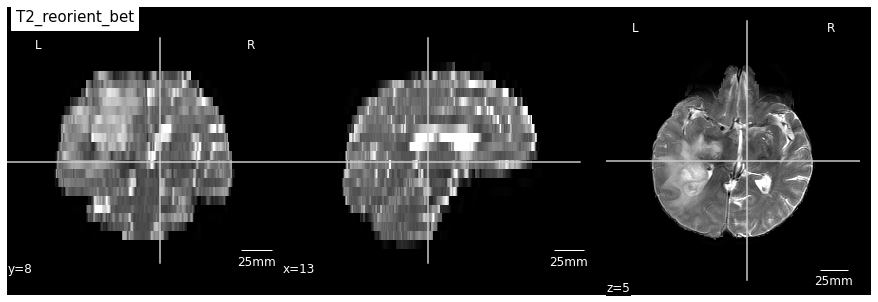

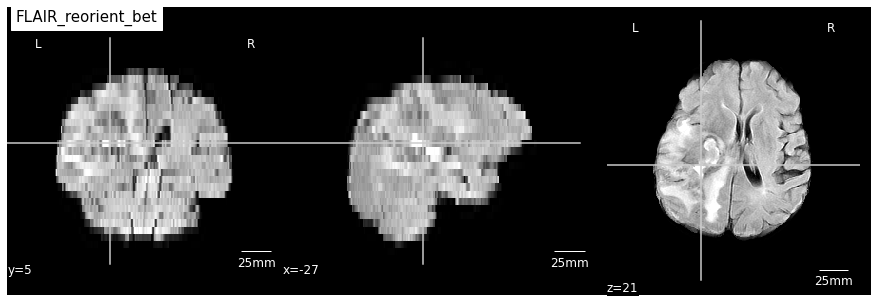

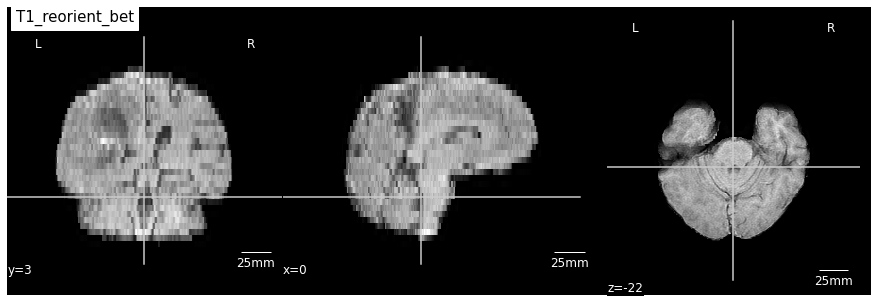

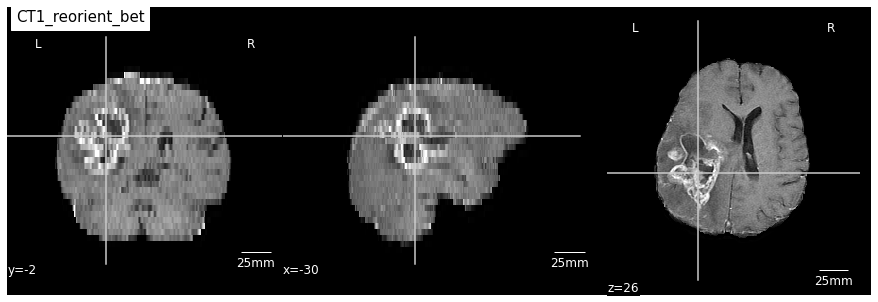

In [20]:
display_chn("T2_reorient_bet", './data/T2_reorient_bet.nii.gz')
display_chn("FLAIR_reorient_bet", './data/FLAIR_reorient_bet.nii.gz')
display_chn("T1_reorient_bet", './data/T1_reorient_bet.nii.gz')
display_chn("CT1_reorient_bet", './data/CT1_reorient_bet.nii.gz')

# Register all skull-stripped channels to T1

**Using `flirt` from FSL**

![skull-stripped-registered-channels](./assets/skull-stripped-registered-channels.png)

In [21]:
# FLIRT (FMRIB's Linear Image Registration Tool) is a fully automated robust and accurate
# tool for linear (affine) intra- and inter-modal brain image registration.
#!flirt

![flir-help](./assets/flirt-help.png)

In [22]:
#%%time
# register all skull-stripped channels to reoriented skull-stripped T1 with 6 DOF and spline interpolation

#!flirt -in ./data/CT1_reorient_bet.nii.gz -ref ./data/T1_reorient_bet.nii.gz -out ./data/CT1_reorient_bet_reg.nii.gz -dof 6 -interp spline
#!flirt -in ./data/T2_reorient_bet.nii.gz -ref ./data/T1_reorient.nii.gz -out ./data/T2_reorient_bet_reg.nii.gz -dof 6 -interp spline
#!flirt -in ./data/FLAIR_reorient_bet.nii.gz -ref ./data/T1_reorient.nii.gz -out ./data/FLAIR_reorient_bet_reg.nii.gz -dof 6 -interp spline

![flirt-run-3chn-to-t1](./assets/flirt-run-3chn-to-t1.png)

**Inspect `flirt` 3D channel registration results**

In [23]:
img_t1_bet = load_chn('./data/T1_reorient_bet.nii.gz')
img_t1gd_bet_reg = load_chn('./data/CT1_reorient_bet_reg.nii.gz')
img_t2_bet_reg = load_chn('./data/T2_reorient_bet_reg.nii.gz')
img_flair_bet_reg = load_chn('./data/FLAIR_reorient_bet_reg.nii.gz')

In [24]:
print('Info %s:' % base)
maxT2 = chn_info('T2_bet_reg',img_t2_bet_reg)
maxFLAIR = chn_info('FLAIR_bet_reg',img_flair_bet_reg)
maxT1 = chn_info('T1_bet (target)',img_t1_bet)
maxCT1 = chn_info('CT1_bet_reg',img_t1gd_bet_reg)

Info ./data/TCGA-06-1802:
 T2_bet_reg.shape: (512, 512, 30)	T2_bet_reg.header.get_zooms(): (0.4297, 0.4297, 5.000104) [mm]  max SI = 1821.00
 FLAIR_bet_reg.shape: (512, 512, 30)	FLAIR_bet_reg.header.get_zooms(): (0.4297, 0.4297, 5.000104) [mm]  max SI = 627.00
 T1_bet (target).shape: (512, 512, 30)	T1_bet (target).header.get_zooms(): (0.4297, 0.4297, 5.000104) [mm]  max SI = 1288.00
 CT1_bet_reg.shape: (512, 512, 30)	CT1_bet_reg.header.get_zooms(): (0.4297, 0.4297, 5.000104) [mm]  max SI = 1736.00


**Reapply T1 brain mask (this is important because HD-GLIO expects non-brain voxels to be 0 and the registration 
process can introduce nonzero values**

In [25]:
#%%time
# reapply T1 brain mask (this is important because HD-GLIO expects non-brain voxels to be 0 and the registration 
#   process can introduce nonzero values
# T1_BRAIN_MASK.nii.gz is the mask (not the brain extracted image!) as obtained from HD-Bet
# fsl5.0-fslmaths
#!fslmaths ./data/CT1_reorient_bet_reg.nii.gz -mas ./data/T1_reorient_bet_mask.nii.gz ./data/CT1_reorient_bet_reg.nii.gz
#!fslmaths ./data/T2_reorient_bet_reg.nii.gz -mas ./data/T1_reorient_bet_mask.nii.gz ./data/T2_reorient_bet_reg.nii.gz
#!fslmaths ./data/FLAIR_reorient_bet_reg.nii.gz -mas ./data/T1_reorient_bet_mask.nii.gz ./data/FLAIR_reorient_bet_reg.nii.gz

![fslmaths-reapply-t1-brain-mask](./assets/fslmaths-reapply-t1-brain-mask.png)

**Inspect `fslmaths` produce non-brain voxels to be 0 (expected by HD-GLIO)**

In [26]:
def display_chn_cut_coords(name_chn, chn, cut_coords):
    fig = plt.figure(figsize=(12, 4))
    display = plotting.plot_anat(chn,title=name_chn, figure=fig, dim=-0.8, cut_coords=cut_coords)
    display.annotate(scalebar=True, scale_size=25, scale_units='mm')
    plotting.show()

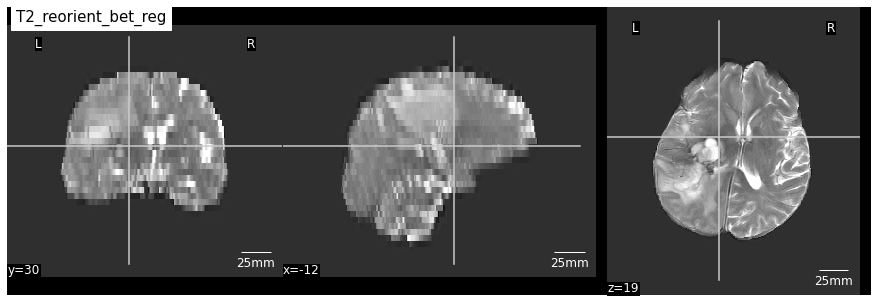

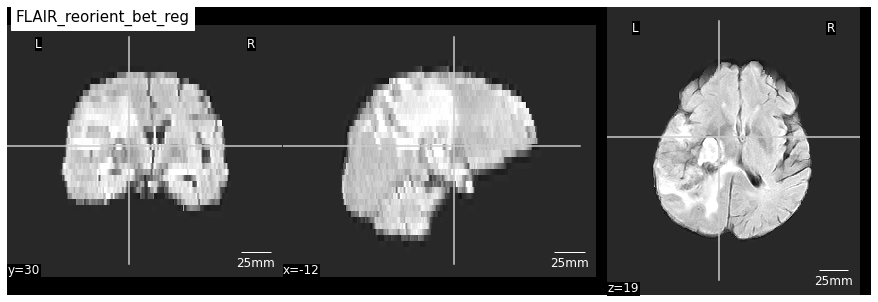

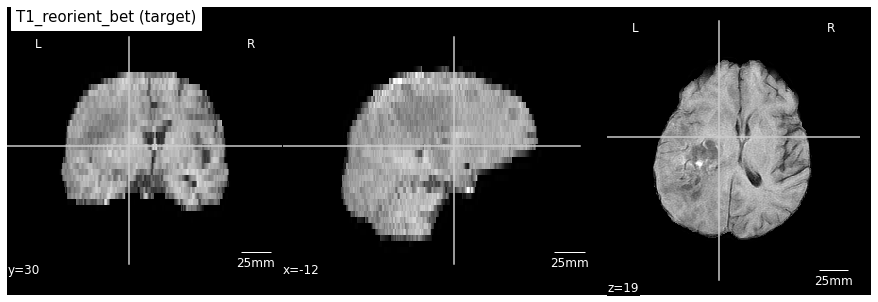

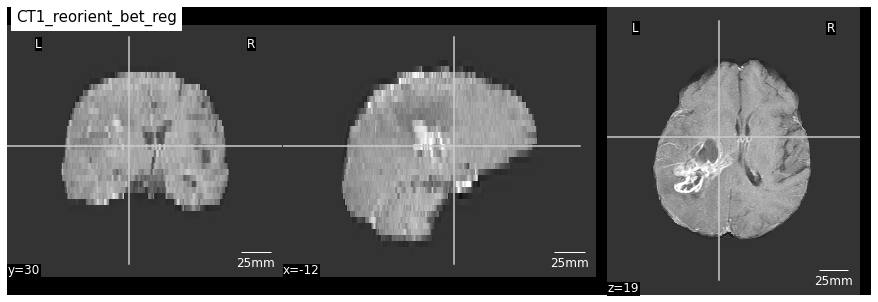

In [27]:
cut_coords = [-12, 30, 19]
display_chn_cut_coords("T2_reorient_bet_reg", './data/T2_reorient_bet_reg.nii.gz', cut_coords=cut_coords)
display_chn_cut_coords("FLAIR_reorient_bet_reg", './data/FLAIR_reorient_bet_reg.nii.gz', cut_coords=cut_coords)
display_chn_cut_coords("T1_reorient_bet (target)", './data/T1_reorient_bet.nii.gz', cut_coords=cut_coords)
display_chn_cut_coords("CT1_reorient_bet_reg", './data/CT1_reorient_bet_reg.nii.gz', cut_coords=cut_coords)

# Apply HD-GLIO to the registered skull-stripped channels

**Inspection of tumor segmentation results (enhancing core + non-enhancing tumor volume)**
![hd-glio-predict-freeview](./assets/hd-glio-predict-freeview.png)

In [28]:
# HD-GLIO help
#!hd_glio_predict -h

![hd-glio-predict-help](./assets/hd-glio-predict-help.png)

In [29]:
#%%time
#!hd_glio_predict \
#-t1 ./data/T1_reorient.nii.gz \
#-t1c ./data/CT1_reorient_bet_reg.nii.gz \
#-t2 ./data/T2_reorient_bet_reg.nii.gz \
#-flair ./data/FLAIR_reorient_bet_reg.nii.gz \
#-o ./data/tcga_06_1802_hd_glio_predict.nii.gz

![hd-glio-predict-run-4chn](./assets/hd-glio-predict-run-4chn.png)

![nvidia-smi-gd-glio](./assets/nvidia-smi-hd-glio.png)

**Inspect `hd_glio_predict` results**

In [30]:
# Visualization


In [31]:
#!freeview -v \
#./data/T2_reorient.nii.gz \
#./data/FLAIR_reorient.nii.gz \
#./data/T1_reorient.nii.gz \
#./data/CT1_reorient.nii.gz \
#./data/tcga_06_1802_hd_glio_predict.nii.gz:colormap=jet:opacity=0.7